## Uber Supply-Demand Gap

In [82]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
uber_request_data = pd.read_csv('Uber Request Data.csv')

In [84]:
uber_request_data.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
3028,4148,City,52.0,Cancelled,14-07-2016 04:57:22,NaN
1713,1151,Airport,181.0,Trip Completed,11/7/2016 20:40,11/7/2016 21:38
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
5344,3556,Airport,NaN,No Cars Available,13-07-2016 18:15:20,NaN
957,101,Airport,99.0,Trip Completed,11/7/2016 5:08,11/7/2016 6:09


In [85]:
uber_request_data.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47


In [86]:
uber_request_data.shape

(6745, 6)

In [87]:
uber_request_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


### Total records in dataset are 6745
### There are Missing values in Driver id and Drop timestamp

### Analysing Status of trips values  

In [88]:
uber_request_data['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

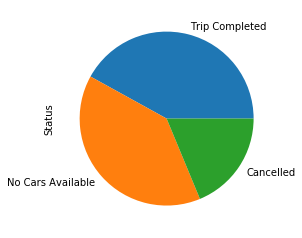

In [89]:
uber_request_data['Status'].value_counts().plot(kind='pie')

#### No Cars Available and Cancelled combined are more than what people who took trip

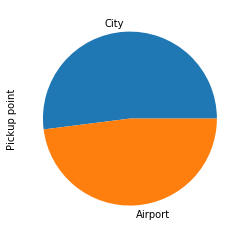

In [90]:
uber_request_data['Pickup point'].value_counts().plot(kind='pie')

In [91]:
uber_request_data.apply(lambda x: len(x.unique()))

Request id           6745
Pickup point            2
Driver id             301
Status                  3
Request timestamp    5618
Drop timestamp       2599
dtype: int64

### Dataset consiste of 301 drivers
### Dataset consist of City and Airport data

In [92]:
uber_request_data.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
5759,4589,City,NaN,No Cars Available,14-07-2016 10:06:29,NaN
6016,5128,Airport,NaN,No Cars Available,14-07-2016 20:12:46,NaN
5792,4697,City,NaN,No Cars Available,14-07-2016 13:12:54,NaN
1569,4336,City,166.0,Trip Completed,14-07-2016 07:14:05,14-07-2016 08:34:21
4704,1768,City,NaN,No Cars Available,12/7/2016 8:53,NaN


### We can see Dates are in different formats. We have to convert them into one date format

In [93]:
def standard_datetime(datetime):
    try:
        return dt.datetime.strptime(datetime, '%d/%m/%Y %H:%M')
    except:
        return dt.datetime.strptime(datetime, '%d-%m-%Y %H:%M:%S')

In [94]:
uber_request_data['Drop_timestamp_formatted'] = uber_request_data.loc[~uber_request_data['Drop timestamp'].isnull()]['Drop timestamp'].apply(lambda date : standard_datetime(date))
uber_request_data['Request_timestamp_formatted'] = uber_request_data.loc[~uber_request_data['Request timestamp'].isnull()]['Request timestamp'].apply(lambda date : standard_datetime(date))

In [95]:
uber_request_data.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop_timestamp_formatted,Request_timestamp_formatted
5058,2585,Airport,NaN,No Cars Available,12/7/2016 21:42,NaN,NaT,2016-07-12 21:42:00
3662,3177,City,199.0,Cancelled,13-07-2016 09:13:12,NaN,NaT,2016-07-13 09:13:12
4892,2297,Airport,NaN,No Cars Available,12/7/2016 18:54,NaN,NaT,2016-07-12 18:54:00
3061,5647,City,59.0,Cancelled,15-07-2016 06:51:10,NaN,NaT,2016-07-15 06:51:10
782,2062,Airport,80.0,Trip Completed,12/7/2016 15:00,12/7/2016 15:54,2016-07-12 15:54:00,2016-07-12 15:00:00


In [96]:
uber_request_data['hour_of_day'] = uber_request_data['Request_timestamp_formatted'].apply(lambda x: x.hour)

In [97]:
uber_request_data.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop_timestamp_formatted,Request_timestamp_formatted,hour_of_day
4980,2454,Airport,NaN,No Cars Available,12/7/2016 20:28,NaN,NaT,2016-07-12 20:28:00,20
1781,717,City,187.0,Trip Completed,11/7/2016 14:52,11/7/2016 15:46,2016-07-11 15:46:00,2016-07-11 14:52:00,14
4493,1153,Airport,NaN,No Cars Available,11/7/2016 20:40,NaN,NaT,2016-07-11 20:40:00,20
4263,690,Airport,NaN,No Cars Available,11/7/2016 13:41,NaN,NaT,2016-07-11 13:41:00,13
1155,1597,City,120.0,Trip Completed,12/7/2016 6:40,12/7/2016 7:42,2016-07-12 07:42:00,2016-07-12 06:40:00,6


In [98]:
uber_request_data['Duration'] = uber_request_data['Drop_timestamp_formatted'] - uber_request_data['Request_timestamp_formatted']
uber_request_data['Duration'] = round(uber_request_data['Duration'].dt.total_seconds()/60,1)

In [99]:
uber_request_data.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop_timestamp_formatted,Request_timestamp_formatted,hour_of_day,Duration
4803,2157,Airport,NaN,No Cars Available,12/7/2016 17:30,NaN,NaT,2016-07-12 17:30:00,17,NaN
174,5890,City,18.0,Trip Completed,15-07-2016 09:43:57,15-07-2016 10:55:22,2016-07-15 10:55:22,2016-07-15 09:43:57,9,71.4
5999,5117,Airport,NaN,No Cars Available,14-07-2016 19:59:48,NaN,NaT,2016-07-14 19:59:48,19,NaN
300,2647,City,30.0,Trip Completed,12/7/2016 22:46,12/7/2016 23:18,2016-07-12 23:18:00,2016-07-12 22:46:00,22,32.0
6043,5173,Airport,NaN,No Cars Available,14-07-2016 20:33:48,NaN,NaT,2016-07-14 20:33:48,20,NaN


In [100]:

# Creating a function to determine the ride slot on basis of 'Request timestamp'
def get_slot(rt):
    if rt in range(4,6):
        return 'Early Morning'
    if rt in range(6,12):
        return 'Morning'
    if rt in range(12,17):
        return 'Afternoon'
    if rt in range(17,20):
        return 'Evening'
    if rt in range(20,24):
        return 'Night'
    if rt in range(0,4):
        return 'Late Night'

uber_request_data['Slot'] = uber_request_data['Request_timestamp_formatted'].dt.hour.apply(lambda hour : get_slot(hour))    


In [101]:
uber_request_data.sample(4)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop_timestamp_formatted,Request_timestamp_formatted,hour_of_day,Duration,Slot
5982,5090,Airport,NaN,No Cars Available,14-07-2016 19:47:18,NaN,NaT,2016-07-14 19:47:18,19,NaN,Evening
2566,6111,City,270.0,Trip Completed,15-07-2016 15:03:22,15-07-2016 16:15:36,2016-07-15 16:15:36,2016-07-15 15:03:22,15,72.2,Afternoon
6067,5206,Airport,NaN,No Cars Available,14-07-2016 20:54:14,NaN,NaT,2016-07-14 20:54:14,20,NaN,Night
5463,3764,Airport,NaN,No Cars Available,13-07-2016 20:35:36,NaN,NaT,2016-07-13 20:35:36,20,NaN,Night


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


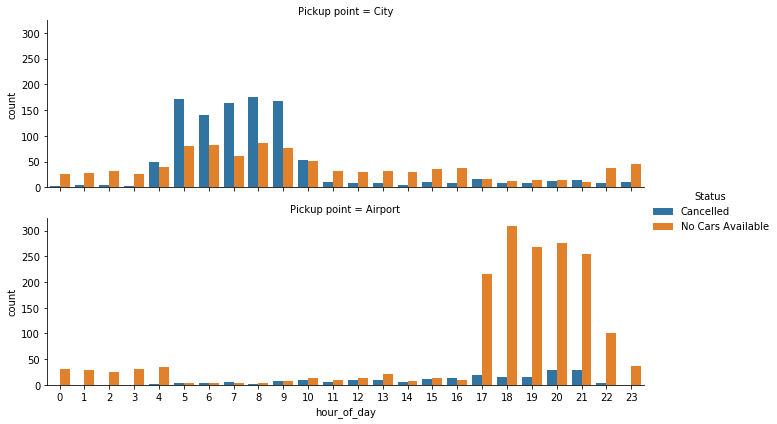

In [102]:
sns.factorplot(x = "hour_of_day", hue = "Status", row = "Pickup point", data = uber_request_data[uber_request_data['Status']!='Trip Completed'], kind = "count", size=3, aspect=3)

In [103]:
def get_day(rt):
    d = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
    return d[rt.weekday()]

uber_request_data['Day'] = uber_request_data['Request_timestamp_formatted'].apply(lambda x: get_day(x))

In [104]:
uber_request_data.sample(4)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Drop_timestamp_formatted,Request_timestamp_formatted,hour_of_day,Duration,Slot,Day
3941,2881,City,267.0,Cancelled,13-07-2016 05:58:31,NaN,NaT,2016-07-13 05:58:31,5,NaN,Early Morning,Wednesday
3611,1632,City,187.0,Cancelled,12/7/2016 7:06,NaN,NaT,2016-07-12 07:06:00,7,NaN,Morning,Tuesday
6548,6389,Airport,NaN,No Cars Available,15-07-2016 19:19:20,NaN,NaT,2016-07-15 19:19:20,19,NaN,Evening,Friday
6645,6550,Airport,NaN,No Cars Available,15-07-2016 21:04:01,NaN,NaT,2016-07-15 21:04:01,21,NaN,Night,Friday


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


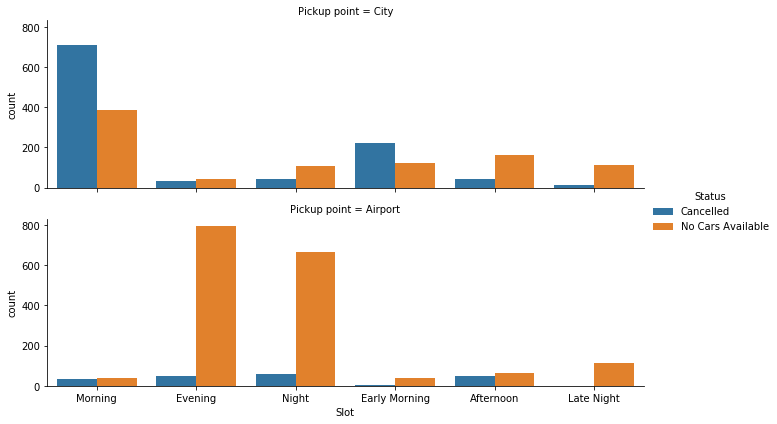

In [105]:
sns.factorplot(x = "Slot", hue = "Status", row = "Pickup point", data = uber_request_data[uber_request_data['Status']!='Trip Completed'], kind = "count", size=3, aspect=3)

### Maximum requests were cancelled in morning in city
### Maximum number of cars were unavailable in evening at airport

In [106]:
supply = uber_request_data.loc[uber_request_data['Status'] == 'Trip Completed'].groupby(['Pickup point', 'hour_of_day'])\
                                                                              .agg({'Request id': 'nunique'}).reset_index()
supply.columns =['Pickup point', 'hour_of_day', 'Supply']

In [107]:
supply.sample(5)

,Pickup point,hour_of_day,Supply
39,City,15,50
15,Airport,15,52
38,City,14,51
12,Airport,12,63
18,Airport,18,81


In [108]:
demand = uber_request_data.groupby(['Pickup point', 'hour_of_day']).agg({'Request id': 'nunique'}).reset_index()
demand.columns =['Pickup point', 'hour_of_day', 'Demand']

In [109]:
demand.sample(2)

,Pickup point,hour_of_day,Demand
35,City,11,107
1,Airport,1,42


In [110]:
demand_supply = pd.merge(demand,supply, on=['Pickup point', 'hour_of_day'], how='left')

In [111]:
demand_supply.sample(5)

,Pickup point,hour_of_day,Demand,Supply
42,City,18,105,83
44,City,20,114,87
34,City,10,168,63
29,City,5,353,100
13,Airport,13,65,35


In [112]:
demand_supply['Demand_supply_gap'] = demand_supply['Demand'] - demand_supply['Supply']

In [113]:
demand_supply.head(5)

,Pickup point,hour_of_day,Demand,Supply,Demand_supply_gap
0,Airport,0,53,23,30
1,Airport,1,42,13,29
2,Airport,2,41,16,25
3,Airport,3,45,15,30
4,Airport,4,72,36,36


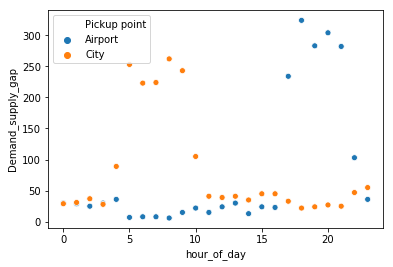

In [114]:
sns.scatterplot(x = "hour_of_day", y = "Demand_supply_gap", data = demand_supply,hue='Pickup point')

### There is a huge Demand supply gap in morning for rides in City while there is a huge demand supply gap for rides from Airport in evening